<a href="https://colab.research.google.com/github/maimonahST/GP/blob/main/ML_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
data_array = np.load('/content/drive/MyDrive/GP-Data/data_array.npy')
label_array = np.load('/content/drive/MyDrive/GP-Data/label_array.npy')
group_array = np.load('/content/drive/MyDrive/GP-Data/group_array.npy')


print(data_array.shape,label_array.shape,group_array.shape)

(7150, 1250, 33) (7150,) (7150,)


In [ ]:
# convert the problem from multiclass classification to binary classification
# make haemorrhage and schaemia classes as one
label_array = label_array.astype('int')
label_array[label_array==0] = 1
label_array[label_array==2] = 0

In [ ]:
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
gkf=GroupKFold()
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.preprocessing import StandardScaler
class StandardScaler3D(BaseEstimator,TransformerMixin):
    #batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self,X,y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self,X):
        return self.scaler.transform(X.reshape( -1,X.shape[2])).reshape(X.shape)

In [ ]:
# Split data_array into train and validate
train_groups = []
for train_index, val_index in gkf.split(data_array, label_array, groups=group_array):
    train_features, train_label = data_array[train_index],label_array[train_index]
    val_features, val_labels = data_array[val_index],label_array[val_index]
    train_groups = group_array[train_index]
    scaler=StandardScaler3D()
    train_features=scaler.fit_transform(train_features)
    val_features=scaler.transform(val_features)
    break

In [ ]:
# Split train_features into train and test
for train_index, test_index in gkf.split(train_features, train_label, groups= train_groups):
    train_features,train_labels=data_array[train_index],label_array[train_index]
    test_features,test_labels=data_array[test_index],label_array[test_index]

    break

In [ ]:
# data spliting percentage
train_p = train_features.shape[0]/data_array.shape[0]
test_p = test_features.shape[0]/data_array.shape[0]
val_p = val_features.shape[0]/data_array.shape[0]

print(f'train_p: {train_p}, test_p: {test_p}, val_p: {val_p}')

print("total: ",train_p + test_p + val_p)

train_p: 0.6419101731601732, test_p: 0.1672077922077922, val_p: 0.19088203463203463
total:  1.0


In [ ]:
# Reshape data for compatibility with classifiers
train_features = train_features.reshape(train_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Build and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features, train_labels)

# Predictions on the validation set
rf_val_predictions = rf_classifier.predict(val_features)
rf_val_accuracy = accuracy_score(val_labels, rf_val_predictions)
print("Random Forest Validation Accuracy:", rf_val_accuracy)
print("Classification Report (Validation):\n", classification_report(val_labels, rf_val_predictions))

# Predictions on the test set
rf_test_predictions = rf_classifier.predict(test_features)
rf_test_accuracy = accuracy_score(test_labels, rf_test_predictions)
print("Random Forest Test Accuracy:", rf_test_accuracy)
print("Classification Report (Test):\n", classification_report(test_labels, rf_test_predictions))

Random Forest Validation Accuracy: 1.0
Classification Report (Validation):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      1.00      1.00       976

    accuracy                           1.00      1411
   macro avg       1.00      1.00      1.00      1411
weighted avg       1.00      1.00      1.00      1411

Random Forest Test Accuracy: 0.9878640776699029
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       435
           1       0.98      1.00      0.99       801

    accuracy                           0.99      1236
   macro avg       0.99      0.98      0.99      1236
weighted avg       0.99      0.99      0.99      1236



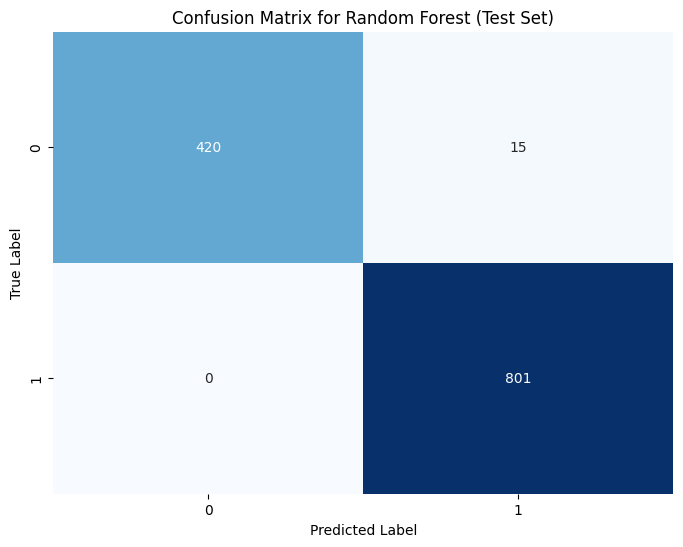

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(test_labels, rf_test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest (Test Set)")
plt.show()

In [ ]:
from joblib import dump, load

dump(rf_classifier, '/content/drive/MyDrive/GP_Models/RF.joblib')

['/content/drive/MyDrive/GP_Models/RF.joblib']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Build and train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_features, train_labels)

# Predictions on the validation set
dt_val_predictions = dt_classifier.predict(val_features)
dt_val_accuracy = accuracy_score(val_labels, dt_val_predictions)
print("Decision Tree Validation Accuracy:", dt_val_accuracy)
print("Classification Report (Validation):\n", classification_report(val_labels, dt_val_predictions))

# Predictions on the test set
dt_test_predictions = dt_classifier.predict(test_features)
dt_test_accuracy = accuracy_score(test_labels, dt_test_predictions)
print("Decision Tree Test Accuracy:", dt_test_accuracy)
print("Classification Report (Test):\n", classification_report(test_labels, dt_test_predictions))

Decision Tree Validation Accuracy: 0.7987243090007087
Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.67      0.68      0.68       435
           1       0.86      0.85      0.85       976

    accuracy                           0.80      1411
   macro avg       0.76      0.77      0.77      1411
weighted avg       0.80      0.80      0.80      1411

Decision Tree Test Accuracy: 0.9838187702265372
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       435
           1       0.98      1.00      0.99       801

    accuracy                           0.98      1236
   macro avg       0.99      0.98      0.98      1236
weighted avg       0.98      0.98      0.98      1236



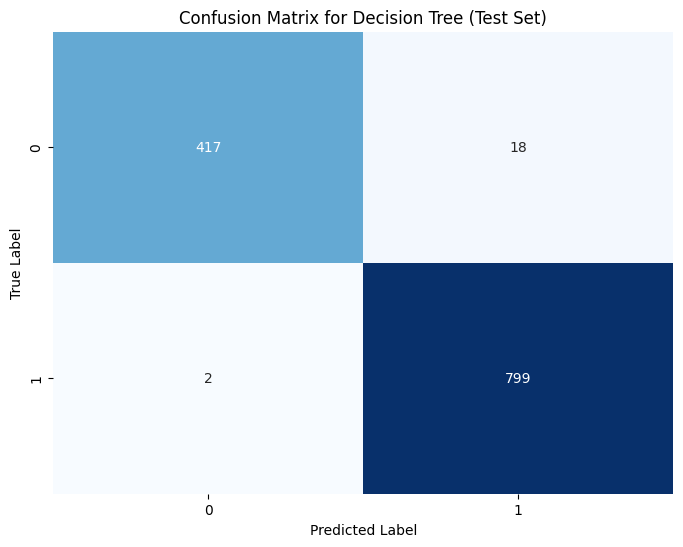

In [ ]:
# Compute the confusion matrix for the test set
cm_test = confusion_matrix(test_labels, dt_test_predictions)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree (Test Set)")
plt.show()


In [ ]:
from joblib import dump, load

dump(dt_classifier, '/content/drive/MyDrive/GP_Models/DT.joblib')

['/content/drive/MyDrive/GP_Models/DT.joblib']

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Build and train AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(train_features, train_labels)

# Predictions on the validation set
adaboost_val_predictions = adaboost_classifier.predict(val_features)
adaboost_val_accuracy = accuracy_score(val_labels, adaboost_val_predictions)
print("AdaBoost Validation Accuracy:", adaboost_val_accuracy)
print("Classification Report (Validation):\n", classification_report(val_labels, adaboost_val_predictions))

# Predictions on the test set
adaboost_test_predictions = adaboost_classifier.predict(test_features)
adaboost_test_accuracy = accuracy_score(test_labels, adaboost_test_predictions)
print("AdaBoost Test Accuracy:", adaboost_test_accuracy)
print("Classification Report (Test):\n", classification_report(test_labels, adaboost_test_predictions))

AdaBoost Validation Accuracy: 0.703756201275691
Classification Report (Validation):
               precision    recall  f1-score   support

           0       1.00      0.04      0.08       435
           1       0.70      1.00      0.82       976

    accuracy                           0.70      1411
   macro avg       0.85      0.52      0.45      1411
weighted avg       0.79      0.70      0.59      1411

AdaBoost Test Accuracy: 0.988673139158576
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       435
           1       0.98      1.00      0.99       801

    accuracy                           0.99      1236
   macro avg       0.99      0.98      0.99      1236
weighted avg       0.99      0.99      0.99      1236



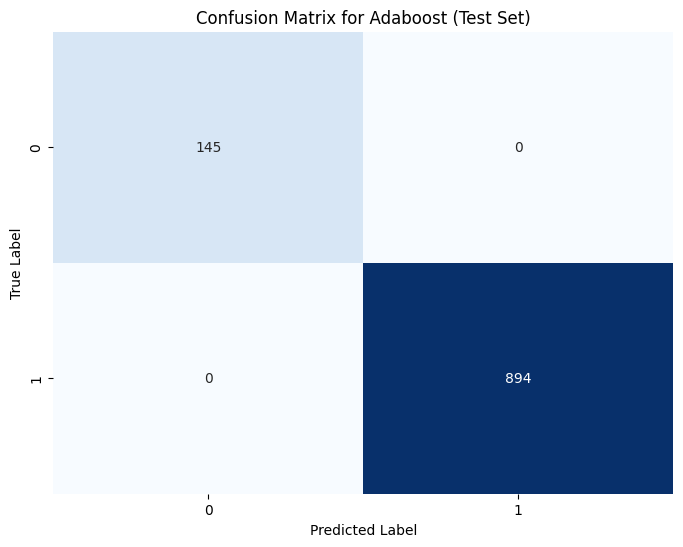

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(test_labels, adaboost_test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Adaboost (Test Set)")
plt.show()

In [ ]:
from joblib import dump, load

dump(adaboost_classifier, '/content/drive/MyDrive/GP_Models/Adaboost.joblib')

['/content/drive/MyDrive/GP_Models/Adaboost.joblib']